<IPython.core.display.Javascript object>


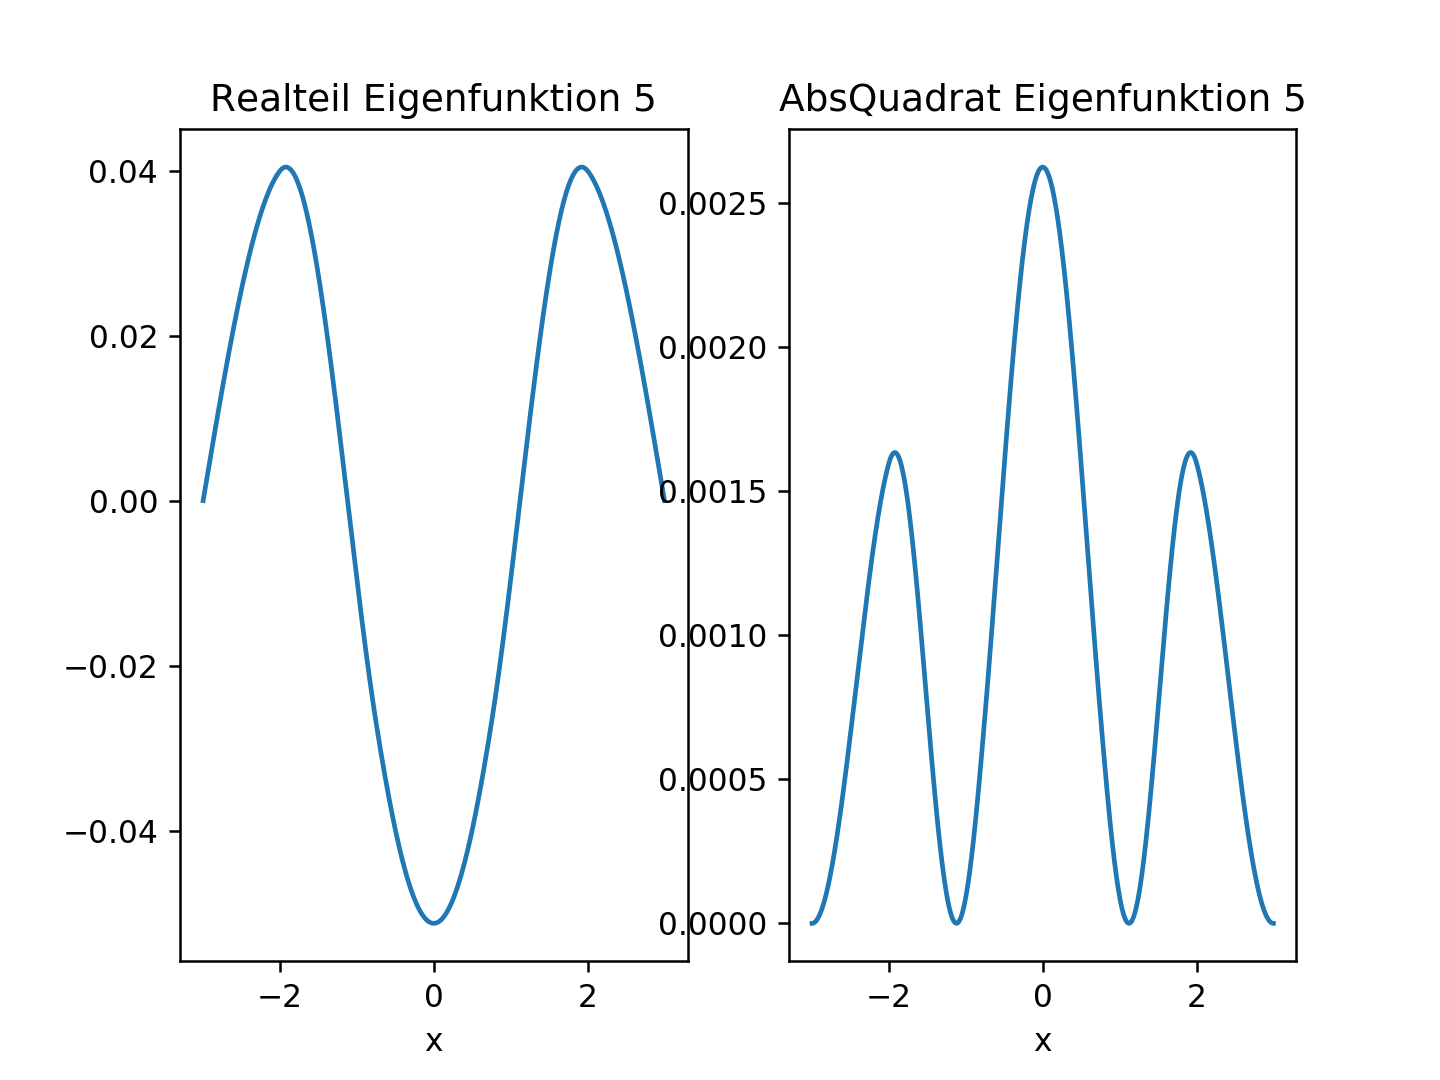

[Text(0.5,0,'x'), Text(0.5,1,'AbsQuadrat Eigenfunktion 1')]

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import scipy.fftpack as ft
from numpy import linalg as LA
import time
import math

#%% Build Hamiltonian
hbar = 1
m = 1

Ngrid = 1000
xmin = -3
xmax = 3

xvec = np.linspace(xmin,xmax,Ngrid)
dx = np.diff(xvec).mean()

#first derivative as operator on the grid (->momentum operator)
dia = 0*np.ones(Ngrid)
offdiap1 = np.ones(Ngrid-1)
offdiam1 = -1*np.ones(Ngrid-1)
d1grid = np.mat(np.diag(dia,0) + np.diag(offdiam1,-1) + np.diag(offdiap1,1))/2/dx
#avoid strange things at the edge of the grid
d1grid[0,:] = 0
d1grid[Ngrid-1,:] = 0

#second derivative as operator on the grid (->kinetic energy)
dia = -2*np.ones(Ngrid)
offdia = np.ones(Ngrid-1)
d2grid = np.mat(np.diag(dia,0) + np.diag(offdia,-1) + np.diag(offdia,1))/dx**2
#avoid strange things at the edge of the grid
d2grid[0,:]=0
d2grid[Ngrid-1,:]=0

Ekin = -hbar**2/(2*m)*d2grid

#define a potential (diagonal matrix)

# Doppelmulde
width = 4
dia = np.ones(xvec.shape)
dia[np.abs(xvec)<width/2]=0
width2 = 1.5
dia[np.abs(xvec)<width2/2]=1

# Trippelmulde
#width = 4
#dia = 100 * np.ones(xvec.shape)
#dia[np.abs(xvec)<width/2]=0
#width2 = 2
#dia[np.abs(xvec)<width2/2]=10
#width3 = 1
#dia[np.abs(xvec)<width3/2]=0

# potential well(Kasten)
#width = 2
#dia = 100*np.ones(xvec.shape)
#dia[np.abs(xvec)<width/2]=0

Epot = np.mat(np.diag(dia,0))

#combine to Hamiltonian
H =  Ekin + Epot

#%%diagonalize and show eigenfunctions (use left/right arrow to go through)
w, v = LA.eig(H)
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

pos = 0
def key_event(e):
    global pos
    if e.key == 'right':
        pos += 1
    elif e.key == 'left':
        pos -= 1
    else:
        return
    pos = pos % EigVecs.shape[1]

    ax1.cla()
    ax1.plot(xvec,np.real(EigVecs[:,pos]))
    ax1.set(title='Realteil Eigenfunktion %d'%(pos+1),xlabel='x')

    ax2.cla()
    ax2.plot(xvec,np.power(np.abs(EigVecs[:,pos]),2))
    ax2.set(title='AbsQuadrat Eigenfunktion %d'%(pos+1),xlabel='x')

    fig.canvas.draw()

fig = plt.figure(1)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.canvas.mpl_connect('key_press_event', key_event)

ax1.cla()
ax1.plot(xvec,np.real(EigVecs[:,pos]))
ax1.set(title='Realteil Eigenfunktion %d'%(pos+1),xlabel='x')

ax2.cla()
ax2.plot(xvec,np.power(np.abs(EigVecs[:,pos]),2))
ax2.set(title='AbsQuadrat Eigenfunktion %d'%(pos+1),xlabel='x')

#plt.show()

In [ ]:
% matplotlib inline 
for k in range(0,4):
    plt.figure(1)
    plt.clf()
    plt.plot(EigVecs[:,k])
    plt.show()
    #time.sleep(0.1)

In [ ]:
# Zeitentwicklung nach Aufgabe 7.3

import cmath
%matplotlib inline

#define a potential (diagonal matrix)

#harmonic oscillator
omega = 2*np.pi;
dia = m/2*omega**2*xvec**2

Epot = np.mat(np.diag(dia,0))

#combine to Hamiltonian
H =  Ekin + Epot

#%%diagonalize and show eigenfunctions (use left/right arrow to go through)
w, v = LA.eig(H)
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

# Zeitentwicklung
def ZeitEnt(vec,t, n):
    t = cmath.exp(-1j*(2*n+1)*omega*t/2) * vec
    return t

pos = 5
    
for t in [0, 1/4, 0.5, 3/4, 1]:
    plt.plot(xvec,np.real(ZeitEnt(EigVecs[:,pos], t, pos)), label="Realanteil")
    plt.plot(xvec,np.power(np.abs(ZeitEnt(EigVecs[:,pos], t, pos)),2), label="AbsQuad")
    plt.legend()
    plt.title("t = %s, pos = %s "%(t, pos))
    plt.show()
